###EXERCISE 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

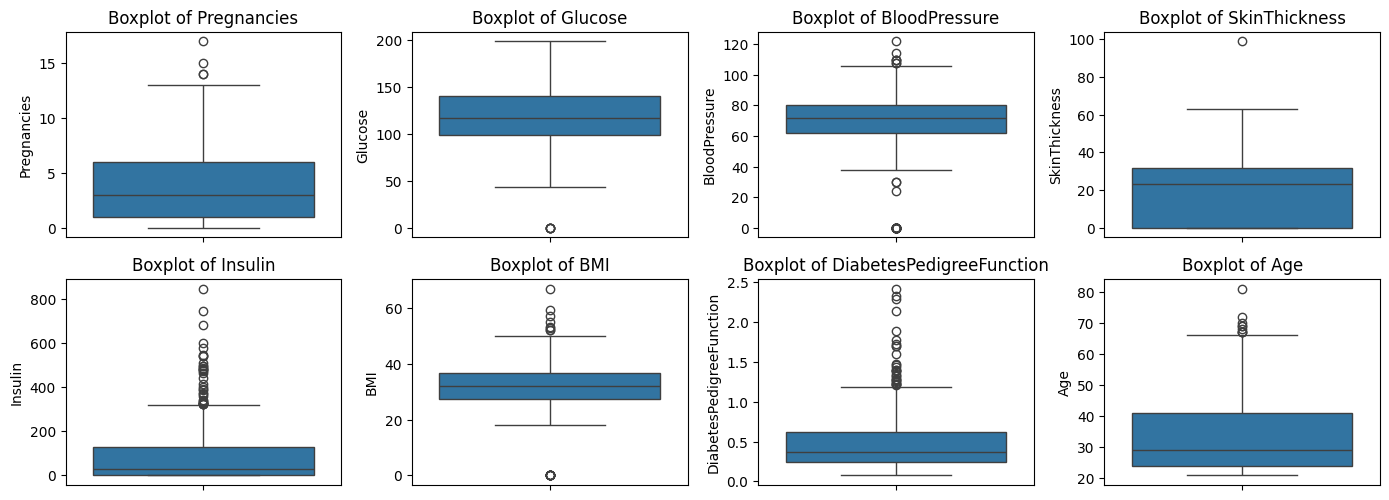

In [ ]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.607510       0.566438       0.207439    0.094326   
std       0.198210    0.160666       0.158654       0.161134    0.136222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.497487       0.508197       0.000000    0.000000   
50%       0.176471    0.587940       0.590164       0.232323    0.036052   
75%       0.352941    0.704774       0.655738       0.323232    0.150414   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.476790                  0.168179    0.204015    0.348958  
std      0.117499                  0.141473    0.196004    0.476951  
min      0.000000                  

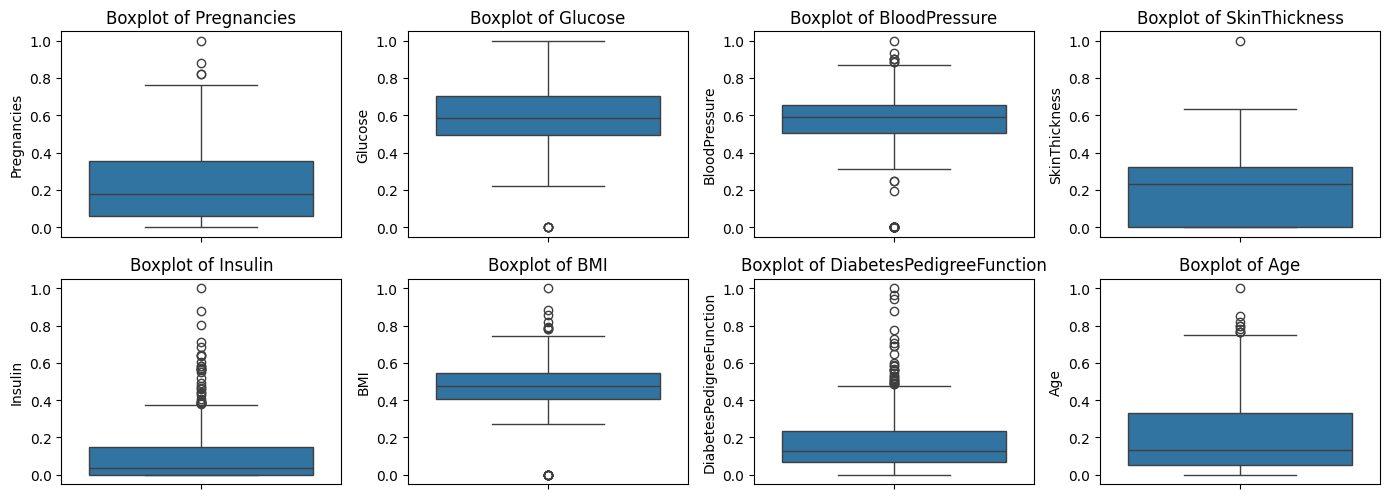

In [ ]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_scaled.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df_scaled[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
random_state = 42
model = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=8, min_samples_leaf=3, max_features= 'auto',
bootstrap= True, random_state=random_state)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,
random_state=42, stratify=y)

In [ ]:
print("Original Outcome Distribution:")
print(y.value_counts(normalize=True))  # Value counts in original data

print("\nTraining Outcome Distribution:")
print(y_train.value_counts(normalize=True))  # Value counts in training set

print("\nTesting Outcome Distribution:")
print(y_test.value_counts(normalize=True))  # Value counts in testing set

Original Outcome Distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Training Outcome Distribution:
Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64

Testing Outcome Distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [ ]:
std_scaler  =  StandardScaler()
model_lr = LogisticRegression(random_state=random_state)
logreg_clf_pipe = Pipeline([('scaler', std_scaler), ('clf', model_lr)])
logreg_clf_pipe.fit(X_train, y_train)
y_pred_test = logreg_clf_pipe.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Recall (Sensitivity):", recall)
print("Precision:", precision)

Accuracy: 0.7445887445887446
Balanced Accuracy: 0.6925925925925926
Recall (Sensitivity): 0.5185185185185185
Precision: 0.6774193548387096


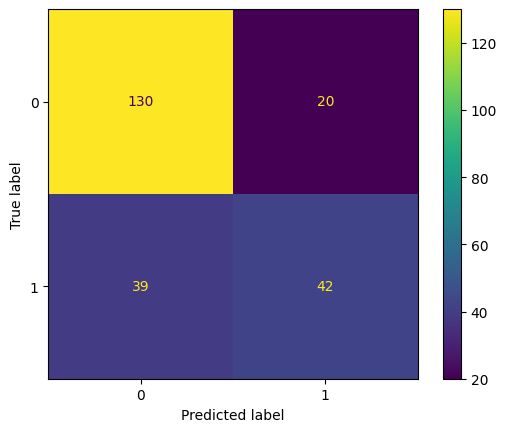

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_clf_pipe.classes_)
disp.plot()

Accuracy: 0.7489177489177489
Balanced Accuracy: 0.6959259259259258
Precision: 0.6885245901639344
Recall: 0.5185185185185185
AUC-ROC: 0.8335802469135802


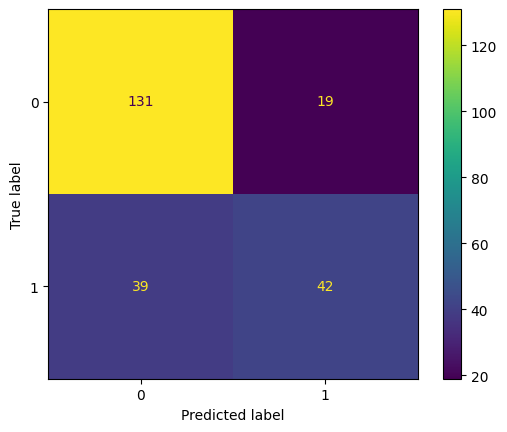

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define and train Random Forest Classifier
rf_clf = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    min_samples_split=8,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_proba_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot()

# Print Results
print(f"Accuracy: {accuracy_rf}")
print(f"Balanced Accuracy: {balanced_accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"AUC-ROC: {auc_roc_rf}")

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall']
# Perform 5-fold stratified cross-validation with multiple metrics
cv_results = cross_validate(logreg_clf_pipe, X_train, y_train, cv=stratified_kfold,
scoring=scoring_metrics)

In [ ]:
print("Cross-validation results:")
for metric in scoring_metrics:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric]}")
    print(f"Mean {metric.capitalize()}: {cv_results['test_' + metric].mean()}")
    print(f"Standard Deviation of {metric.capitalize()}: {cv_results['test_' + metric].std()}")

Cross-validation results:
Accuracy: [0.73148148 0.7962963  0.78504673 0.78504673 0.81308411]
Mean Accuracy: 0.7821910695742471
Standard Deviation of Accuracy: 0.027353644752274944
Precision: [0.64516129 0.83333333 0.69444444 0.85       0.74285714]
Mean Precision: 0.7531592421915003
Standard Deviation of Precision: 0.07876945549690893
Recall: [0.52631579 0.52631579 0.67567568 0.45945946 0.7027027 ]
Mean Recall: 0.5780938833570413
Standard Deviation of Recall: 0.09432458067411209


###EXERCISE 5


In [ ]:
# model  creation
std_scaler  =  StandardScaler()
model = LogisticRegression(random_state=random_state)
clf_pipe = Pipeline([('scaler', std_scaler), ('clf', model)])
clf_pipe.fit(X_train, y_train)
y_pred_test = clf_pipe.predict(X_test)

#accessing the different steps of pipeline
importance = clf_pipe['clf'].coef_[0]
feature_=names  clf_pipe['scaler'].get_feature_names_out()
print(feature_names)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


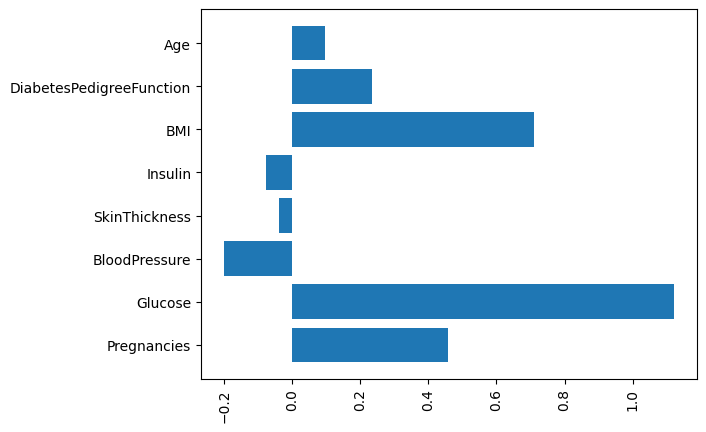

In [ ]:
plt.barh([x for x in range(len(importance))], importance, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.show()

https://stackoverflow.com/questions/51006193/interpreting-logistic-regression-feature-coefficient-values-in-sklearn
https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html


In [ ]:
coefs = pd.DataFrame(
    model.coef_[0],  # Access coefficients directly using .coef_[0]
    columns=["Coefficients"],
    index=feature_names,
)
print(coefs)

                          Coefficients
Pregnancies                   0.456320
Glucose                       1.122905
BloodPressure                -0.201972
SkinThickness                -0.039277
Insulin                      -0.075888
BMI                           0.711123
DiabetesPedigreeFunction      0.234348
Age                           0.096158


Accuracy: 0.7402597402597403
Balanced Accuracy: 0.7148148148148148
Precision: 0.6296296296296297
Recall: 0.6296296296296297
AUC-ROC: 0.7839094650205762


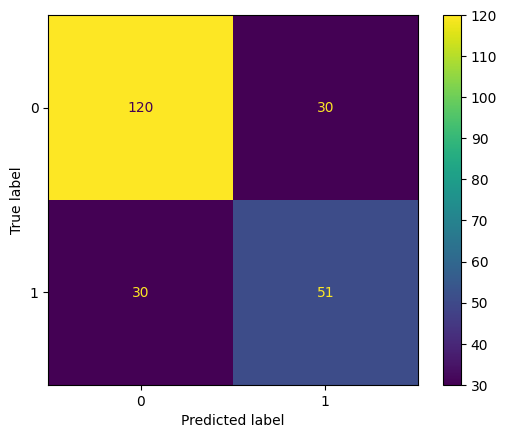

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

##building the model for 1.2
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42)

dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
balanced_accuracy_dt = balanced_accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
auc_roc_dt = roc_auc_score(y_test, y_proba_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels= dt.classes_)
disp_dt.plot()

# Print Results
print(f"Accuracy: {accuracy_dt}")
print(f"Balanced Accuracy: {balanced_accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"AUC-ROC: {auc_roc_dt}")

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(
    dt,
    feature_names=feature_names,
    class_names=["Non-Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the decision tree
graph = graphviz.Source(dot_data)
graph.view()  # Saves and opens the visualization


'Source.gv.pdf'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    min_samples_split=8,
    bootstrap=True,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Make predictions and calculate the metrics
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_proba_rf)


In [ ]:
feature_importance = rf_clf.feature_importances_
features = X_train.columns  # Assuming X_train is a DataFrame


In [ ]:
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)


In [ ]:
print(importance_df)

                    Feature  Importance
1                   Glucose    0.365611
5                       BMI    0.171865
7                       Age    0.117386
0               Pregnancies    0.091434
4                   Insulin    0.080327
6  DiabetesPedigreeFunction    0.079878
2             BloodPressure    0.053506
3             SkinThickness    0.039993


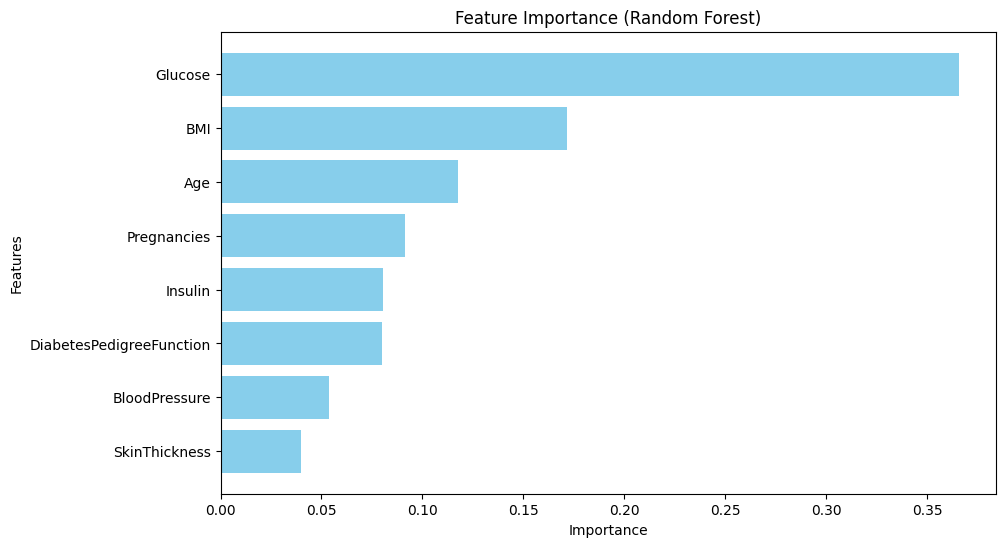

The most important feature is: Glucose


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

# Most important feature
most_important_feature = importance_df.iloc[0]["Feature"]
print(f"The most important feature is: {most_important_feature}")

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
#computation of the permutation importance
perm_importance = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
sorted = np.argsort(perm_importance.importances_mean)

In [ ]:
perm_df = pd.DataFrame({
    "Feature": features[sorted],
    "Importance_Mean": perm_importance.importances_mean[sorted],
    "Importance_Std": perm_importance.importances_std[sorted]
})

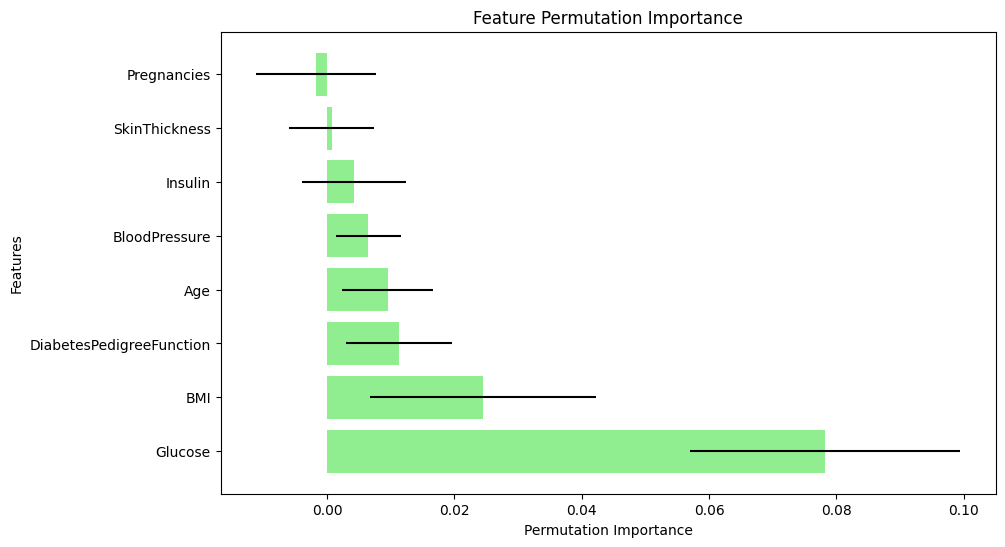

                    Feature  Importance_Mean  Importance_Std
0               Pregnancies        -0.001732        0.009458
1             SkinThickness         0.000722        0.006621
2                   Insulin         0.004185        0.008174
3             BloodPressure         0.006494        0.005092
4                       Age         0.009524        0.007104
5  DiabetesPedigreeFunction         0.011255        0.008335
6                       BMI         0.024531        0.017755
7                   Glucose         0.078211        0.021235


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(perm_df["Feature"], perm_df["Importance_Mean"], xerr=perm_df["Importance_Std"], color='lightgreen')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Permutation Importance")
plt.gca().invert_yaxis()
plt.show()

print(perm_df)

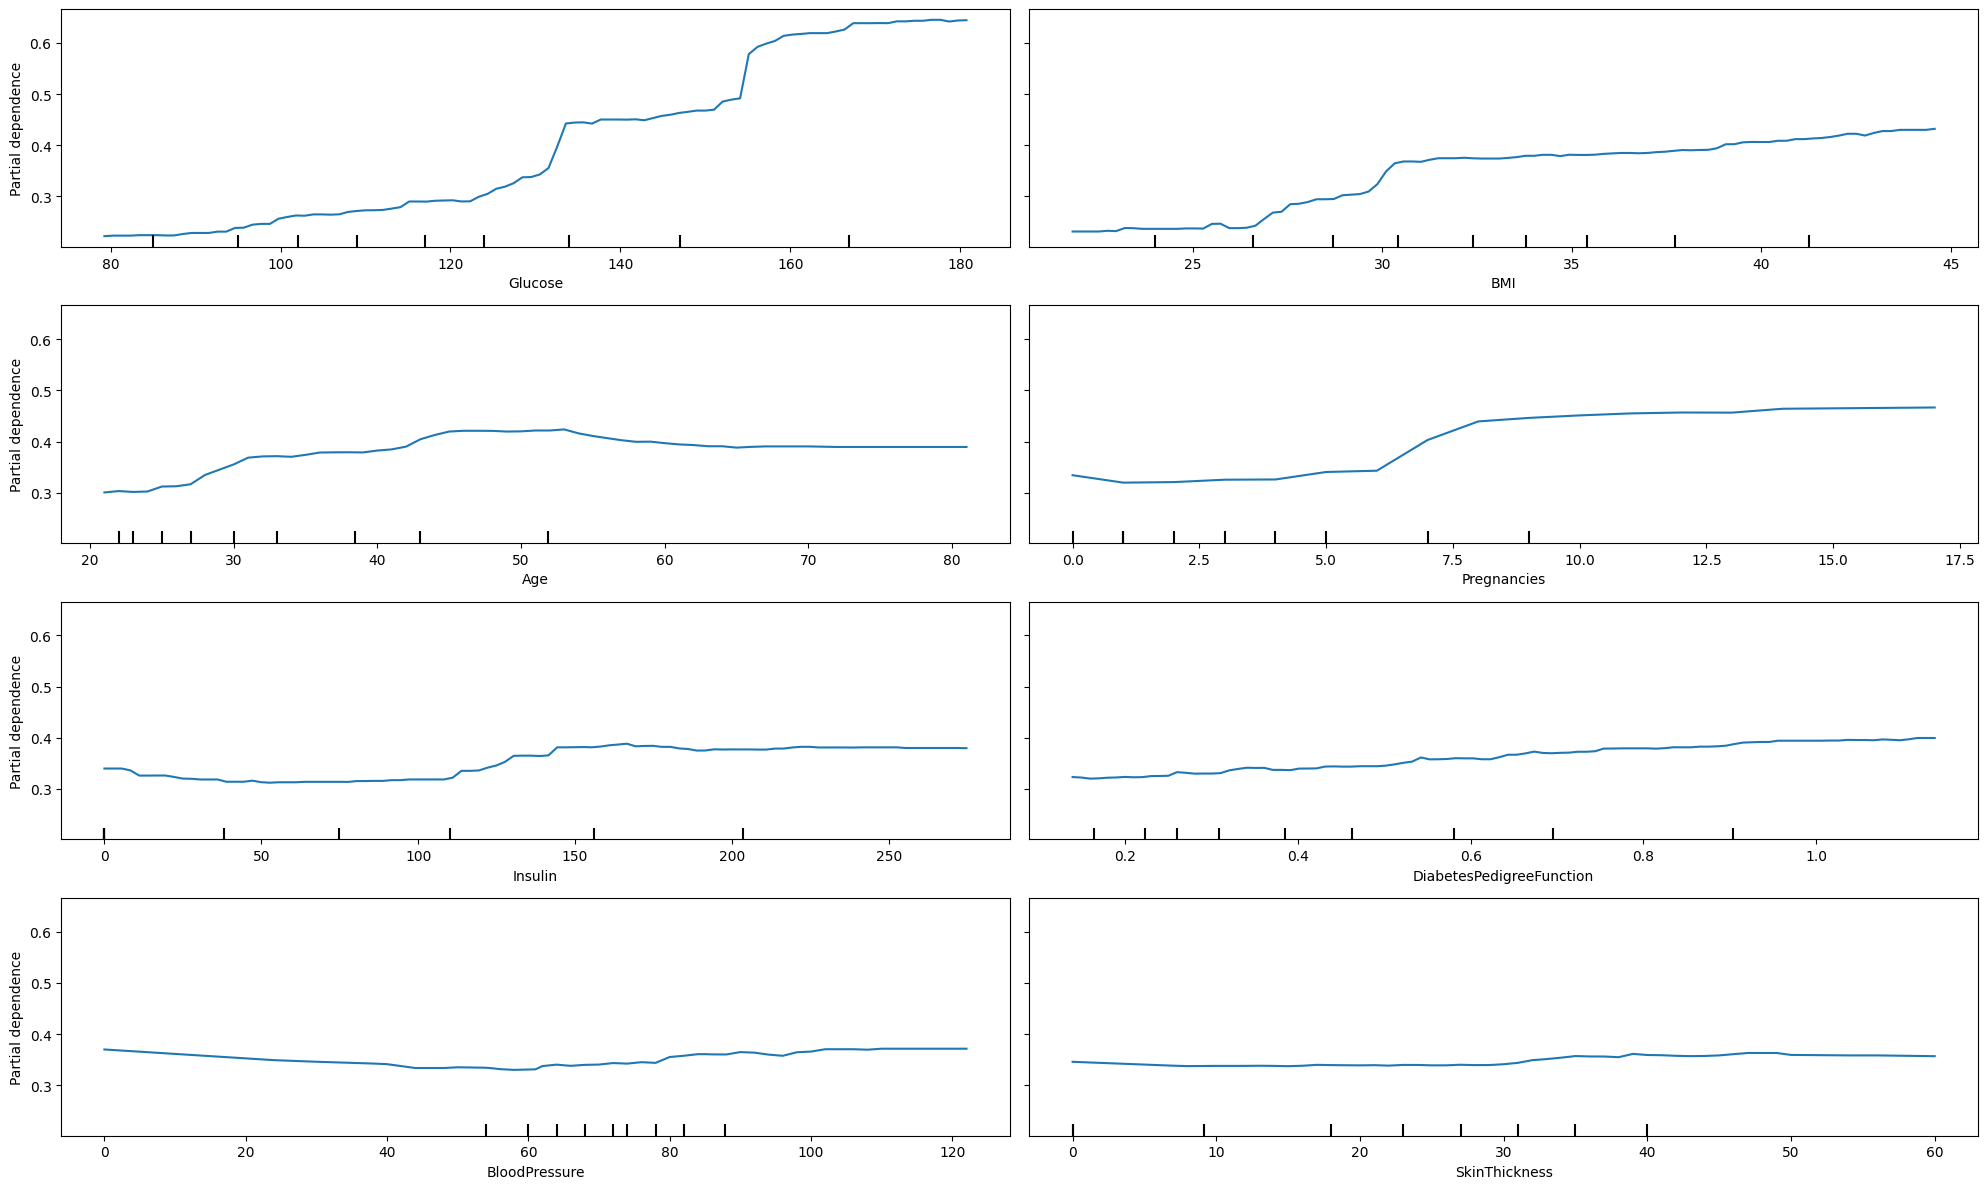

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Generate PDPs for the 8 most important features
top_8_features = importance_df["Feature"].head(8).tolist()

fig, axes = plt.subplots(4, 2, figsize=(20, 12))  # Create subplots for 8 features
PartialDependenceDisplay.from_estimator(
    rf_clf, X_train, top_8_features, ax=axes
)
plt.tight_layout()
plt.show()